In [13]:
# === Paso a paso completo para clustering con KMeans ===
import os
os.environ["OMP_NUM_THREADS"] = "2"


# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

# 2. Cargar la data preprocesada
df= pd.read_csv(r"C:\Users\darly\OneDrive\Escritorio\IA_explorer2\dataSet\data_preprocesada_4.csv")

print(df.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'job_title_clean', 'employee_residence_clean',
       'company_location_clean', 'log_salary_usd', 'remote_type',
       'salary_class'],
      dtype='object')


In [15]:
df.shape

(607, 18)

In [7]:
# 3. Aplicar codificaciones según tipo de variable
onehot_cols = ['job_title_clean', 'salary_currency', 'company_location_clean', 'employee_residence_clean']
ordinal_cols = ['experience_level', 'employment_type']

# Definir orden lógico para experiencia
experience_order = [['EN', 'MI', 'SE', 'EX']]
employment_order = [['CT', 'FL', 'PT', 'FT']]



In [8]:
#definir preprocesador
preprocessor = ColumnTransformer(transformers=[
    (('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_cols)),
    ('ordinal', OrdinalEncoder(categories=[experience_order[0], employment_order[0]]), ordinal_cols)
])

In [9]:
#tuberia
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('cluster', KMeans(n_clusters=4, random_state=42))
])

# Ajustar pipeline y obtener predicciones
pipeline.fit(df)
clusters = pipeline.named_steps['cluster'].labels_
print(clusters)
df['cluster'] = clusters



[0 1 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 0 3 1 1 1 2 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 3 1
 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 0 2 1 2 1 1 1 1 0 1 1 1 1 1 3 1 1 1 2 0
 3 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 3 1 1 1 1 1 1 1 2 2 0 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 0 1 1 1 1 1 1 1 1 1 1 1 3 2 0 1 1 0 1 1 1 3
 2 3 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 3 1 1 3 1 1 1 1 2 1 1 1 0 1
 0 1 0 2 2 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 3 1 1 3 1 1 1 1 1 1 3 3 3 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 3 3 1 1 1 1 1 0 3 1 1 1 1 1 1 1 3 1
 1 3 1 3 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 3 1 1 1 1 1 1 3 3
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 1 1 0 2 0 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

C:\Users\darly\anaconda3\envs\IAeXPOLORER2\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Índice de Silueta (K=4): 0.348


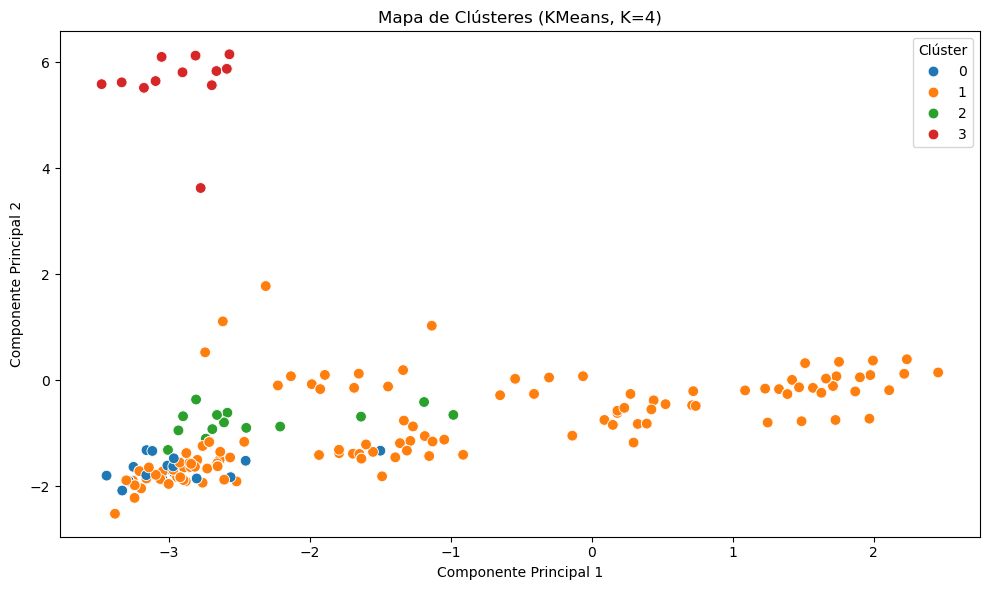

Índice de Silueta (K=4): 0.348

Perfiles promedio por clúster:
          Unnamed: 0  work_year      salary  salary_in_usd  remote_ratio  \
cluster                                                                   
0            204.03    2020.93    70486.86       81553.62         62.07   
1            313.86    2021.44   269083.13      121416.12         74.21   
2            199.46    2021.00  1991249.89       27488.21         60.71   
3            309.27    2021.59    61655.82       81670.98         45.45   

         log_salary_usd  salary_class  
cluster                                
0                 11.19          1.14  
1                 11.50          0.93  
2                  9.91          1.07  
3                 11.25          1.52  

Cargos más comunes por clúster:

Clúster 0: Other, Data Scientist, Data Engineer
Clúster 1: Other, Data Scientist, Data Engineer
Clúster 2: Other, Data Scientist, Machine Learning Engineer
Clúster 3: Data Engineer, Data Scientist, Other


In [12]:
# 5. Obtener matriz escalada desde la pipeline y calcular índice de silueta
X_scaled = pipeline.named_steps['scaler'].transform(
    pipeline.named_steps['preprocessor'].transform(df)
)
sil_score = silhouette_score(X_scaled, clusters)
print(f"Índice de Silueta (K=4): {sil_score:.3f}")

# 6. Reducir a 2D para visualización con PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
df_viz = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])
df_viz['cluster'] = clusters

# 7. Visualizar mapa de clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
plt.title("Mapa de Clústeres (KMeans, K=4)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clúster")
plt.tight_layout()
plt.show()

# 8. Evaluar calidad de los clústeres con el índice de silueta
sil_score = silhouette_score(X_scaled, clusters)
print(f"Índice de Silueta (K=4): {sil_score:.3f}")

# 9. Analizar perfiles promedio por clúster
perfiles = df.groupby('cluster').mean(numeric_only=True).round(2)
print("\nPerfiles promedio por clúster:\n", perfiles)

# 10. (Opcional) Analizar columnas categóricas por clúster
grupo_titulos = df.groupby('cluster')['job_title_clean'].apply(lambda x: x.value_counts().nlargest(3).index.tolist())
print("\nCargos más comunes por clúster:\n")
for cluster_id, titles in grupo_titulos.items():
    print(f"Clúster {cluster_id}: {', '.join(titles)}")


